# K-Means Clustering (Customer Credit Card Segmentation)

## Explanation

### Objective

Create a machine learning model that can cluster a customer based on the Credit Card data, using the K-Means Clsutering algorithm.

### Column Descriptions

- ***Sl_No*** = A unique sequential identifier for each record
- ***Customer Key*** = A unique ID assigned to each customer to distinguish them from others.
- ***AvgCreditLimit*** = The average amount of credit limit assigned to the customer across all their credit cards.
- ***TotalCreditCards*** = The total number of credit cards owned by the customer.
- ***Totalvisitsbank*** = The number of times the customer has physically visited the bank branch.
- ***Totalvisitsonline*** = The number of times the customer has visited the bank's online platform (website or app).
- ***Totalcallsmade*** = The number of times the customer has called the bank's customer support service.

## A. Data Preparation

### A.1 Import Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### A.2 Load Data

In [44]:
try:
    df = pd.read_csv('customercreditcard.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [45]:
df.shape

(660, 7)

### A.4 Viewing Data Informations

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### A.5 Viewing Data Statistics

In [47]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0000,330.5000,190.6699,1.0000,165.7500,330.5000,495.2500,660.0000
Customer Key,660.0000,55141.4439,25627.7722,11265.0000,33825.2500,53874.5000,77202.5000,99843.0000
Avg_Credit_Limit,660.0000,34574.2424,37625.4878,3000.0000,10000.0000,18000.0000,48000.0000,200000.0000
Total_Credit_Cards,660.0000,4.7061,2.1678,1.0000,3.0000,5.0000,6.0000,10.0000
Total_visits_bank,660.0000,2.4030,1.6318,0.0000,1.0000,2.0000,4.0000,5.0000
Total_visits_online,660.0000,2.6061,2.9357,0.0000,1.0000,2.0000,4.0000,15.0000
Total_calls_made,660.0000,3.5833,2.8653,0.0000,1.0000,3.0000,5.0000,10.0000


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [48]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [49]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


### A.7 Viewing Duplicated Data

In [50]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [51]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### A.9 Viewing Outliers Data

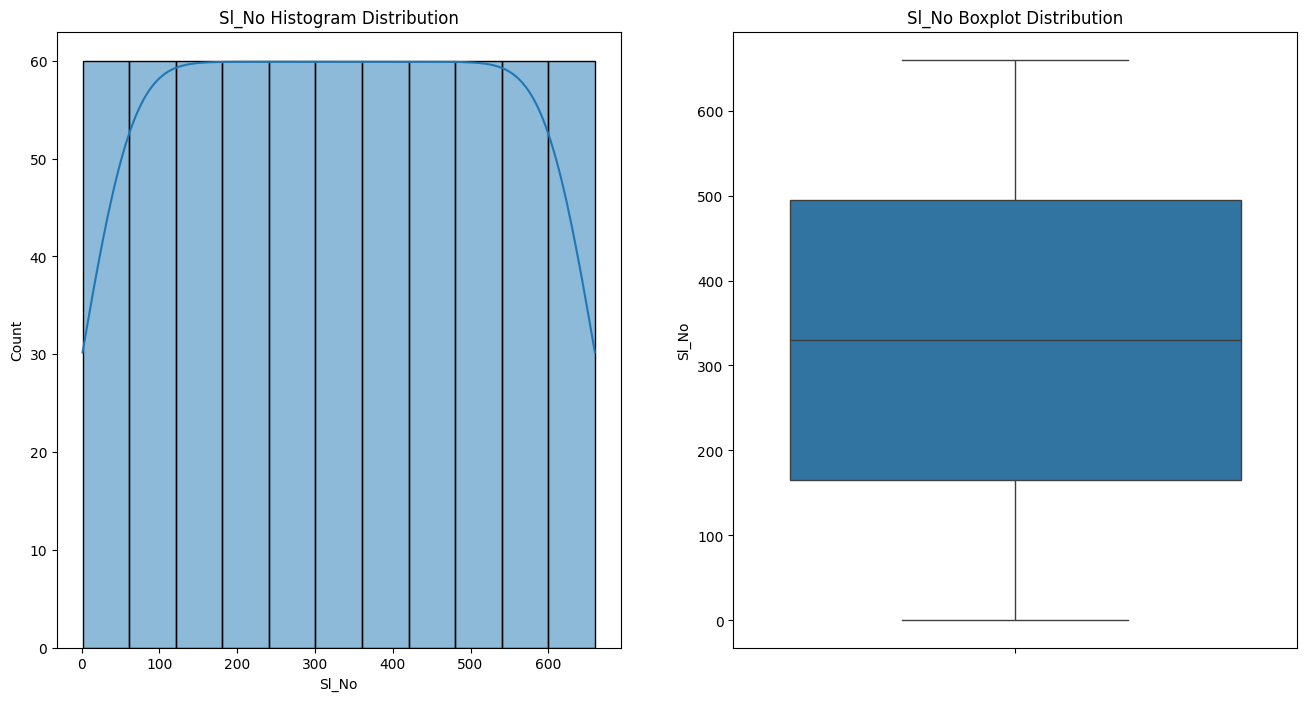

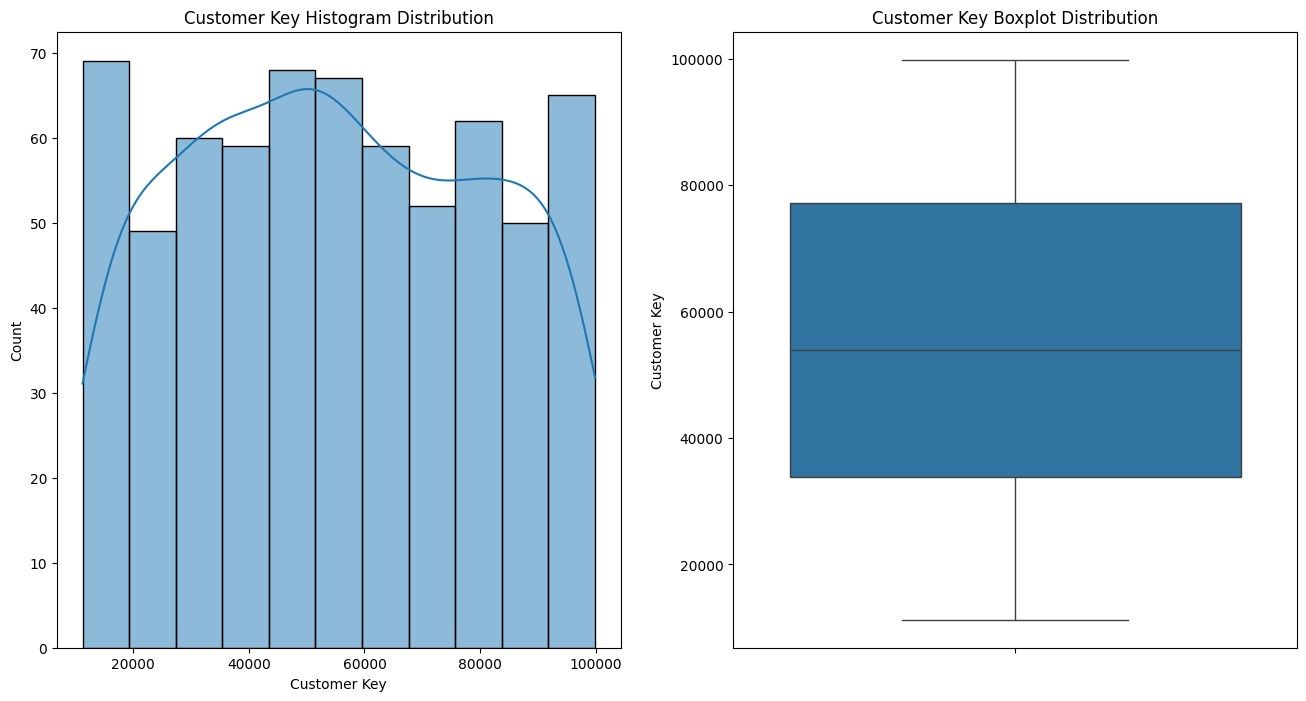

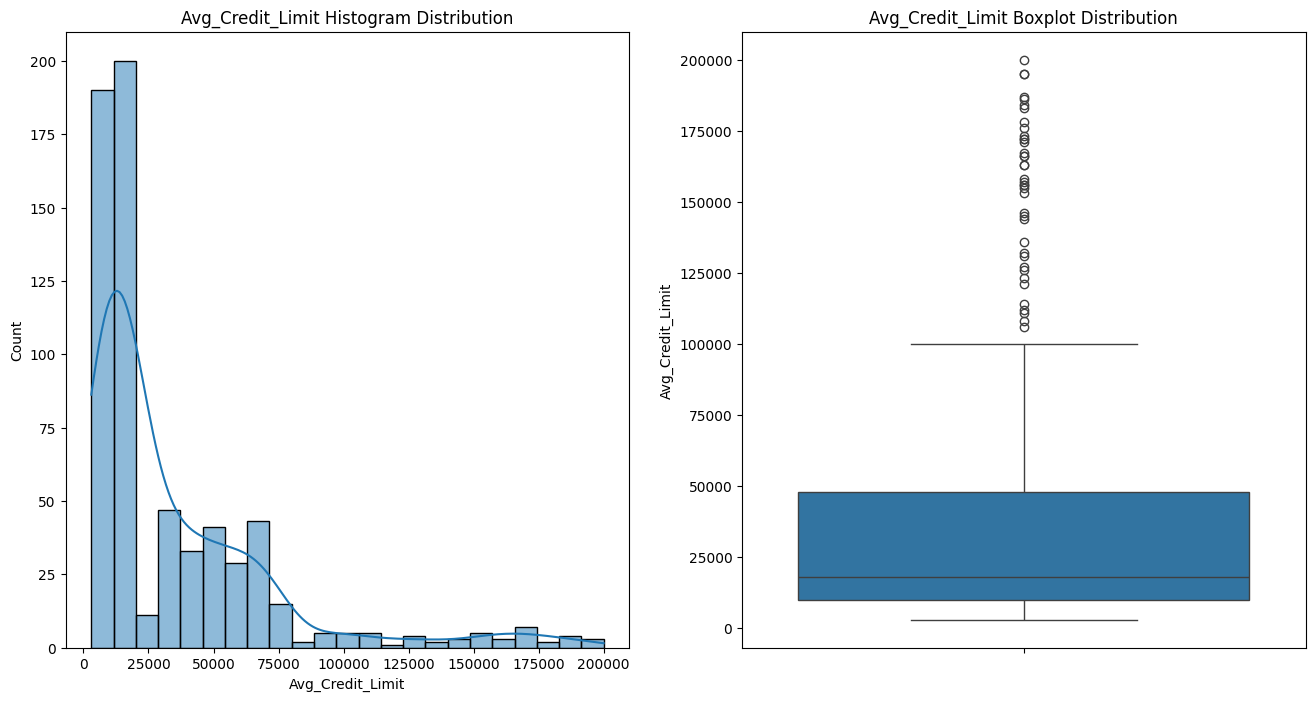

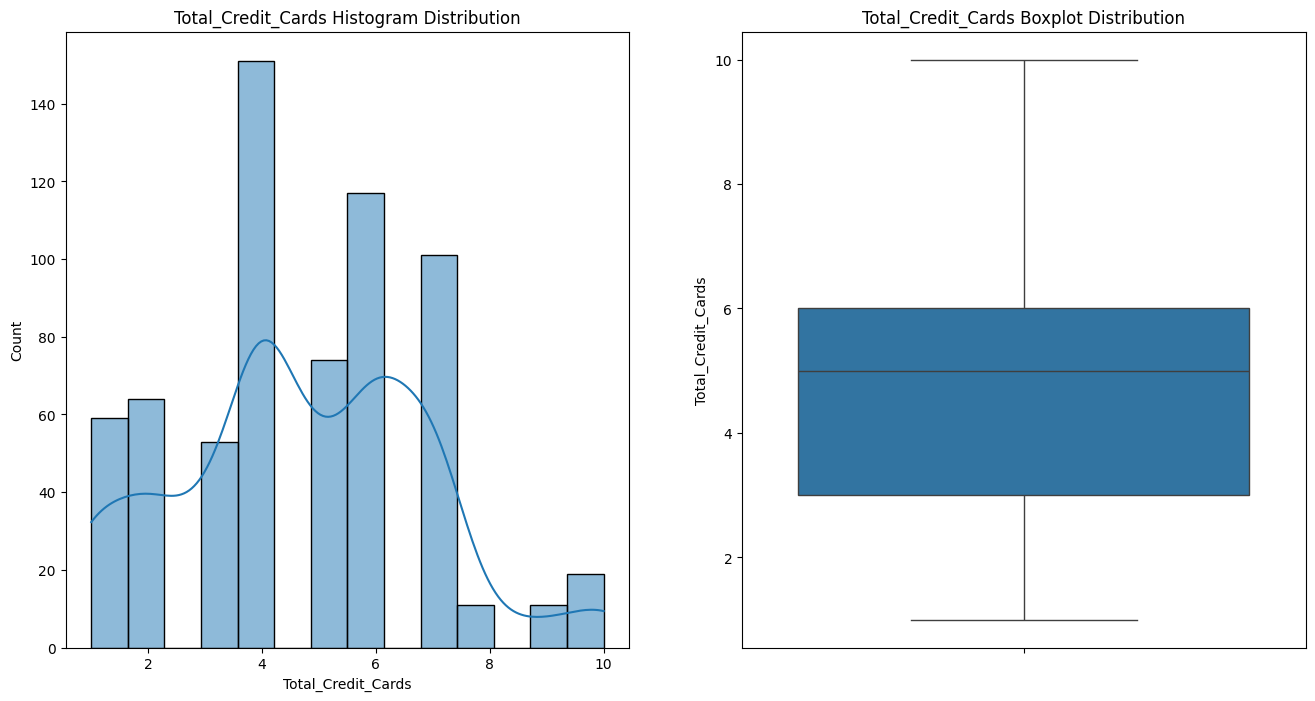

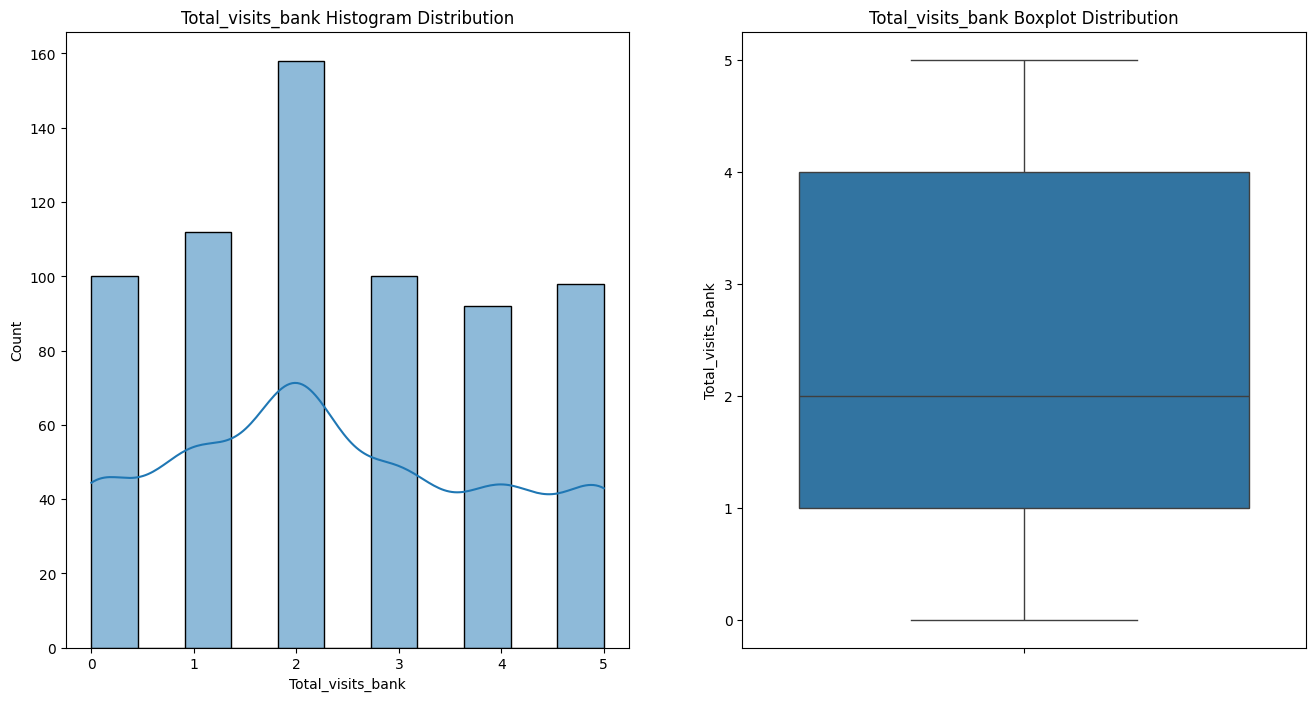

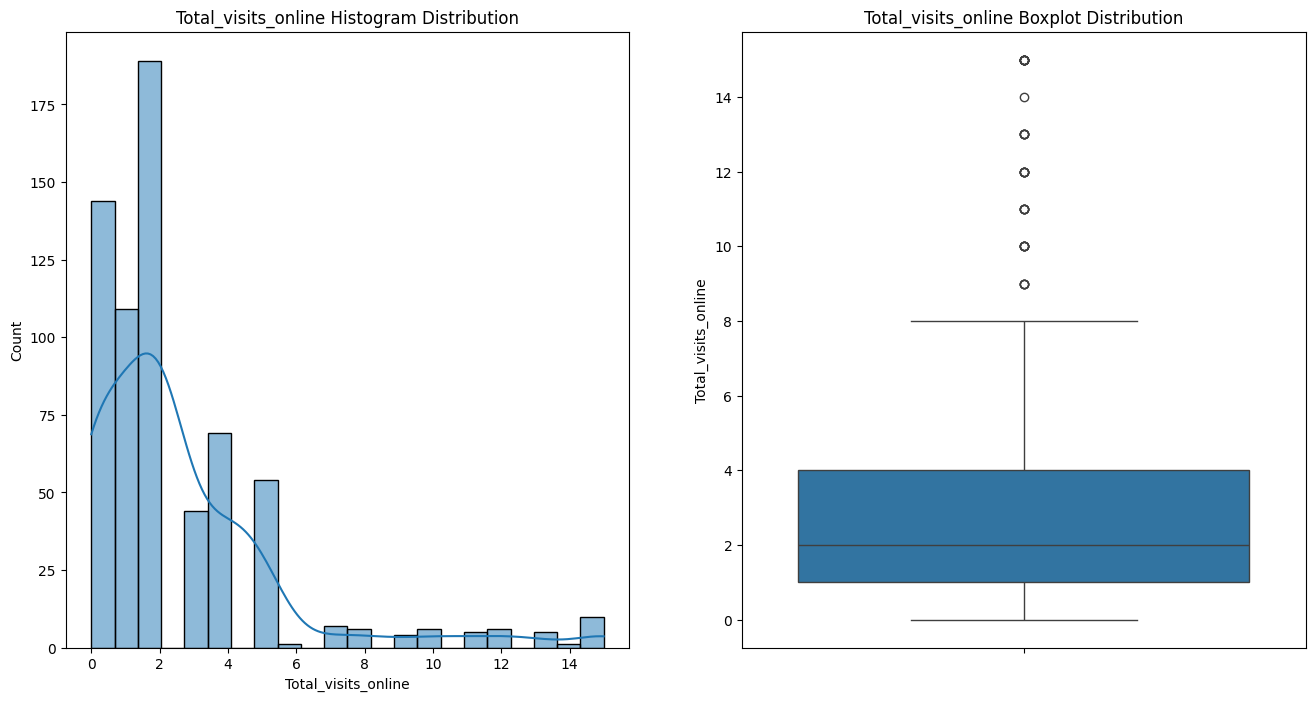

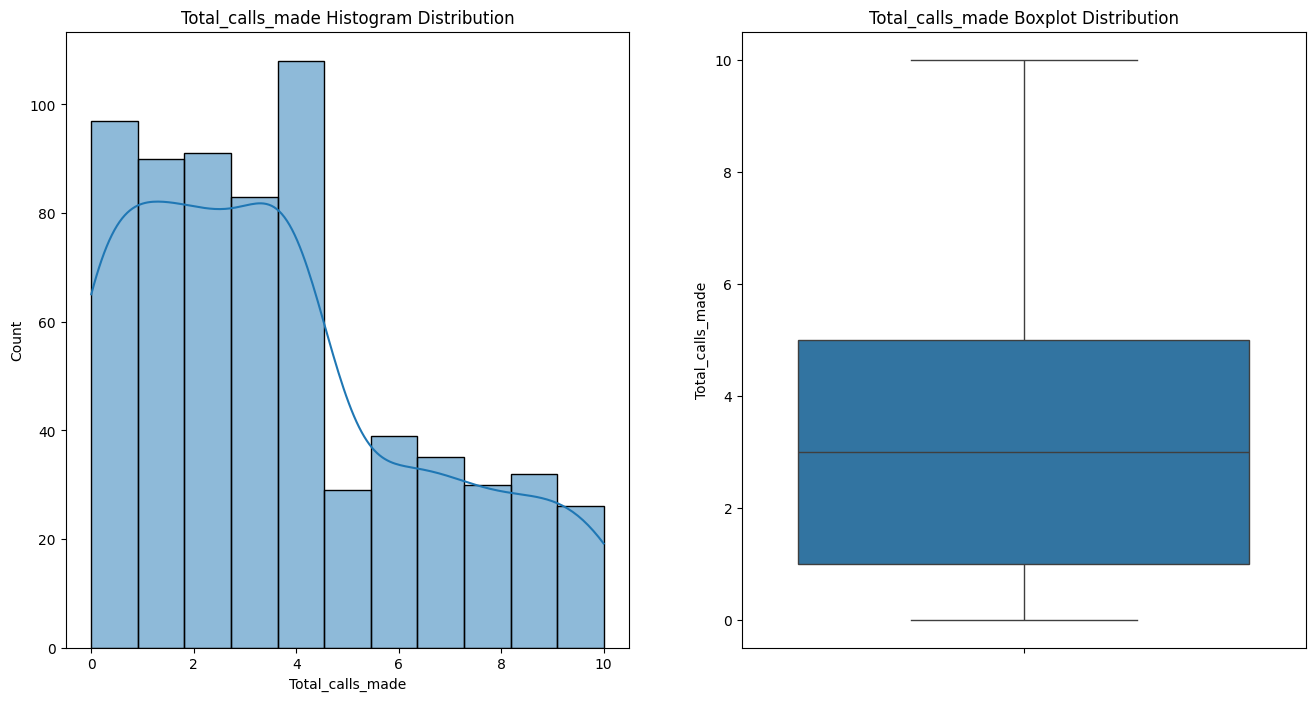

In [52]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"{col} Histogram Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxplot Distribution")

## B. Data Preprocessing

### B.1 Drop Unrelated Columns

In [54]:
df_clean = df.drop(columns=['Sl_No', 'Customer Key'])

In [55]:
df_clean.duplicated().sum()

np.int64(11)

In [56]:
df_clean.drop_duplicates(inplace=True)

### B.2 Feature Engineering

#### Adding New Columns

Total_Interactions

In [57]:
df_clean['Total_Interactions'] = df_clean['Total_visits_bank'] + df_clean['Total_visits_online'] + df_clean['Total_calls_made']

In [58]:
df_clean.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interactions
0,100000,2,1,1,0,2
1,50000,3,0,10,9,19
2,50000,7,1,3,4,8
3,30000,5,1,1,4,6
4,100000,6,0,12,3,15


Avg_Limit_Per_Card

In [59]:
df_clean['Avg_Limit_Per_Card'] = df_clean['Avg_Credit_Limit'] / df_clean['Total_Credit_Cards']

In [61]:
df_clean.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interactions,Avg_Limit_Per_Card
0,100000,2,1,1,0,2,50000.000000
1,50000,3,0,10,9,19,16666.666667
2,50000,7,1,3,4,8,7142.857143
3,30000,5,1,1,4,6,6000.000000
4,100000,6,0,12,3,15,16666.666667


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

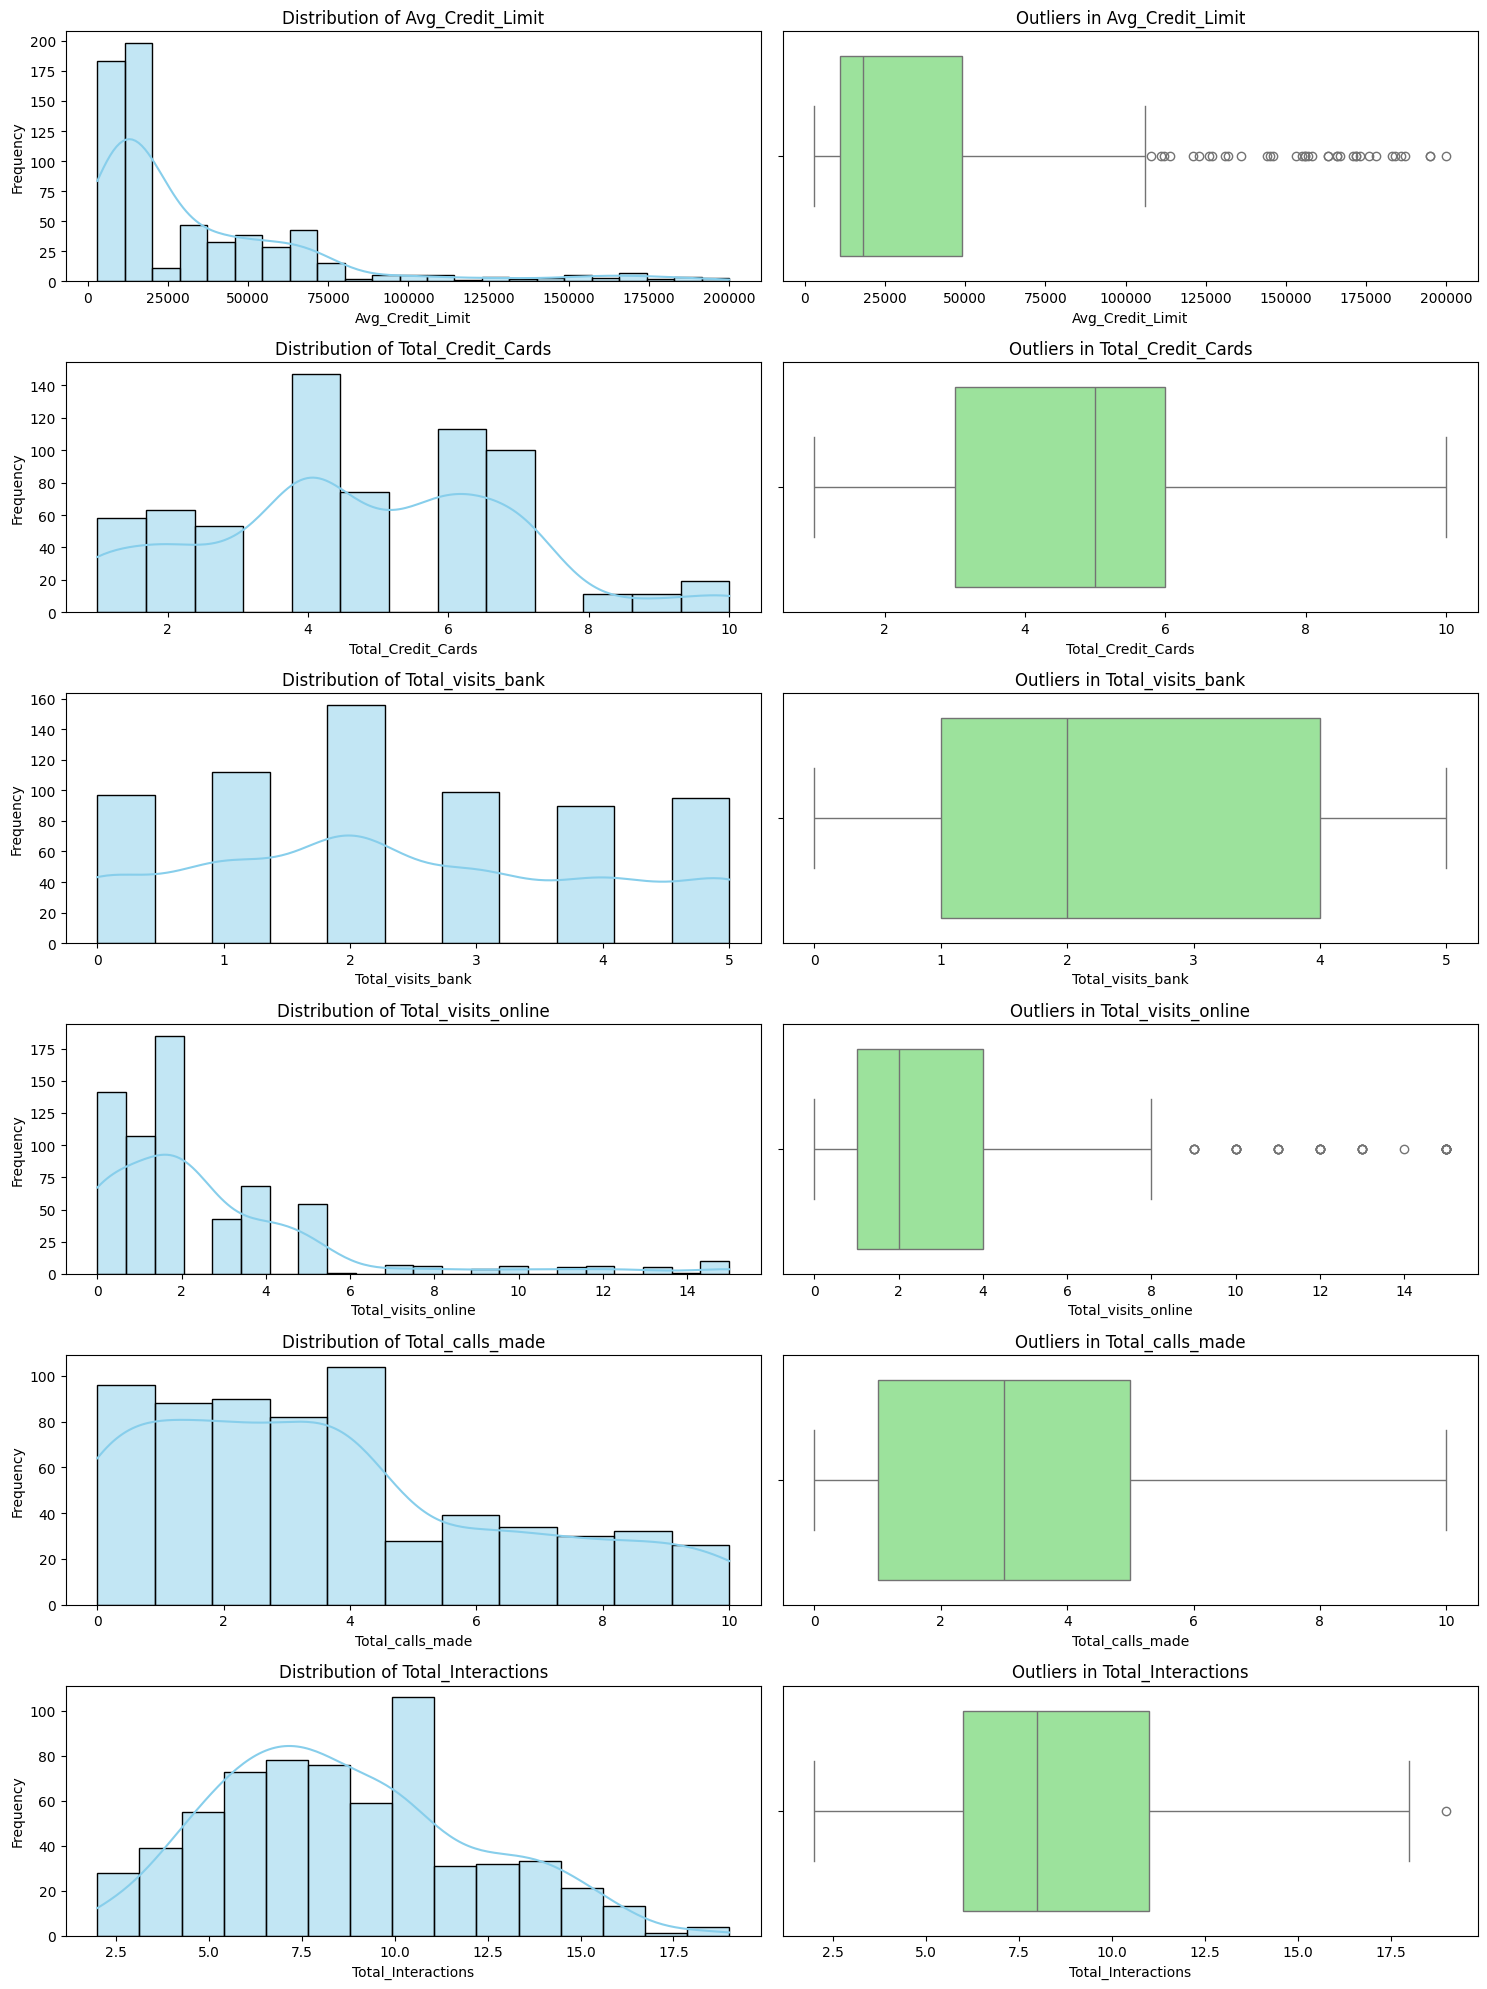

In [62]:
cols_to_plot = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 
                'Total_visits_online', 'Total_calls_made', 'Total_Interactions']

plt.figure(figsize=(15, 20))

for i, col in enumerate(cols_to_plot):
    # 1. Histogram (Distribution)
    plt.subplot(len(cols_to_plot), 2, i*2 + 1)
    sns.histplot(df_clean[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # 2. Boxplot (Outliers)
    plt.subplot(len(cols_to_plot), 2, i*2 + 2)
    sns.boxplot(x=df_clean[col], color='lightgreen')
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()